# Self-consistent mean field solution in real space

In [1]:
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field/src/lib')
from lib.lib_tmd_model import setParams, HribbonRealSpace
from lib.lib_solvers import solve_self_consistent_real_space
from lib.lib_init_cond import *
from lib.lib_plot import showLattice, showGrandpotentialMinimization

## Set the desired parameters

Nx : Number of atoms along the longitudinal direction

Ny : Number of atoms along the transverse direction

nHole : Density of holes (to study a hole-doped system)

invTemp : Inverse temperature (if we set it very high, we get T = 0)

betaStart : Inverse temperature at which the annealing starts

betaSpeed : This parameter (> 1) regulates the speed of the annealing

betaThreshold : The point at which annealing stops (and after which we jump to the desired temperature - maybe zero!)

anneal_or_not : Turn annealing on or off

t : Hopping normalization (defines the units in which energies are measured, for TMDs by default - if t = 1 - it's t0)

U : On-site interaction

itMax : Maximum allowed number of iterations

dyn : 'kick' (random small deviation), 'local' (local update), 'mixed' (both), 'wait' (both, waiting for a while)

singleExcitationFreq : How often to shake up the Markovian dynamics

osc : Oscillations in the annealing scheme

dampFreq : Frequency of the damping

tmd : choose the TMD (MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2)

K: Hopping matrix

delta : Tolerance for updated densities convergence

nUp, nDown = ferro(...) : Initial condition

In [52]:
# Number of orbitals in the model
nOrb = 3

# Dimensions of the ribbon
Nx = 8

Ny = 4

# Model parameters
t = 1
U = 20

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)
K = HribbonRealSpace(nOrb, Nx, Ny, E0, E1, E2, E3, E4, E5, E6)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = True
osc = False

# Inverse temperature and annealing parameters
invTemp = 1
betaStart = 0.2
betaSpeed = 1.12
betaThreshold = 20

# Solver parameters
itMax = 60
dampFreq = 1
delta = 1e-5
singleExcitationFreq = itMax + 1
dyn = 'mixed'

# Initial conditions
seed = 1
nUp, nDown = random(2 / 3, nOrb * Nx * Ny, seed)

# Show initial condition

This is the initial condition you chose:


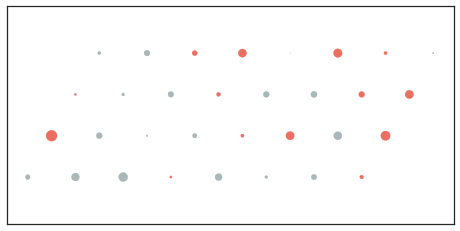

In [53]:
print("This is the initial condition you chose:")
dotscale = 100
SAVE = False
name = 'initCond_ferroU' + str(U) + 'Nx' + str(Nx) + 'Ny' + str(Ny)
showLattice(nUp, nDown, Nx, Ny, nOrb, dotscale, SAVE, name)

# Iterative mean field solution

In [54]:
%%time

nUp, nDown, energies,\
lastGrandpotential, itSwitch, lastIt, mu,\
eUp, eDown, wfUp, wfDown\
= solve_self_consistent_real_space(Nx, Ny, nOrb, nHole, invTemp, betaStart, betaSpeed, betaThreshold,\
anneal_or_not, t, U, itMax, dampFreq, dyn, singleExcitationFreq, osc,\
K, abs_t0, delta, nUp, nDown)

Started annealing.

Inverse temperature:  0.19999999999999996

iteration:  0
deltaUp:  0.138576862403
deltaDown:  0.147042894039 

Inverse temperature:  0.32000000000000006
Inverse temperature:  0.45440000000000014
Inverse temperature:  0.6049280000000004
Inverse temperature:  0.7735193600000005
Inverse temperature:  0.9623416832000007
Inverse temperature:  1.173822685184001

Finished annealing.


iteration:  10
deltaUp:  0.000203241119773
deltaDown:  0.00016392108064 


iteration:  20
deltaUp:  9.60070515915e-05
deltaDown:  6.25378342978e-05 


iteration:  30
deltaUp:  2.8027176412e-05
deltaDown:  2.49580989142e-05 


iteration:  40
deltaUp:  5.45924502044e-05
deltaDown:  3.59633072273e-05 


iteration:  50
deltaUp:  1.83509339618e-05
deltaDown:  1.13913844242e-05 


Total number of iterations:  54 

CPU times: user 488 ms, sys: 33.1 ms, total: 521 ms
Wall time: 499 ms


# Show solution

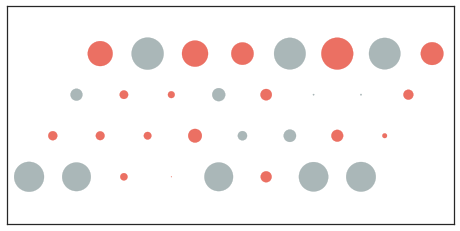

In [55]:
dotscale = 1000
SAVE = False
name = 'solution_ferroU' + str(U) + 'Nx' + str(Nx) + 'Ny' + str(Ny)
showLattice(nUp, nDown, Nx, Ny, nOrb, dotscale, SAVE, name)

# Show minimization of grandpotential functional

The final value of the grandpotential per site was:  0.322062856579


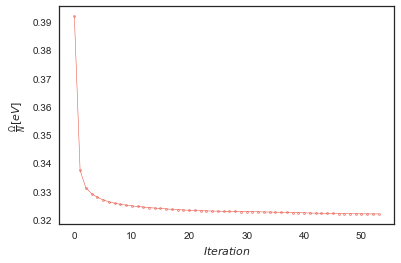

In [56]:
showGrandpotentialMinimization(itSwitch, lastIt, energies)
print("The final value of the grandpotential per site was: ", lastGrandpotential)